In [39]:
import numpy as np

In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

# 01. Naive Bayes

In [41]:
# shell scripts for downloading the data and placing it in a corresponding directory
!mkdir .cache & mkdir .cache/newsgroups
!curl -o .cache/newsgroups/news.tar.gz "http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz" -C -
# extract the files
!gzip -d < .cache/newsgroups/news.tar.gz | tar xf - --directory .cache/newsgroups
# !ls ./newsgroups/*

mkdir: .cache/newsgroups: File exists
mkdir: .cache: File exists
** Resuming transfer from byte position 14464277
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   389    0   389    0     0   1501      0 --:--:-- --:--:-- --:--:--  1501


In [42]:
from mll2021ss.helpers.file import read_file, read_files
from mll2021ss.helpers.vectorizer import vectorize_by_grouping, vectorize_texts, vectorize_text_by_vocabulary, vectorize_texts_by_vocabulary
from mll2021ss.helpers.text import tokenize
from mll2021ss.helpers.features import extract_raw_features_and_targets
from mll2021ss.classifiers.naive_bayes import naive_bayes_train, naive_bayes_predict

In [43]:
import os

# Reference the paths to our dataset
base_path_newsgroups = ".cache/newsgroups/"
path_newsgroups_train = os.path.join(base_path_newsgroups, "20news-bydate-train")
path_newsgroups_test = os.path.join(base_path_newsgroups, "20news-bydate-test")

In [44]:
data_train = read_files(path_newsgroups_train)
data_test = read_files(path_newsgroups_test)

raw_features, raw_targets = extract_raw_features_and_targets(data_train)
raw_features_test, raw_targets_test = extract_raw_features_and_targets(data_test)

In [45]:
X, vocabulary = vectorize_texts(raw_features)
Y, classes_map = vectorize_by_grouping(np.array(raw_targets).reshape((-1, 1)))

X_test = vectorize_texts_by_vocabulary(raw_features_test, vocabulary)
Y_test, _ = vectorize_by_grouping(np.array(raw_targets_test).reshape((-1, 1)))

In [46]:
classes, prior_probability, likelihood = naive_bayes_train(X, Y)
Y_hat, index = naive_bayes_predict(X_test, classes, prior_probability, likelihood)

In [47]:
np.sum(Y_hat == Y_test, axis=0)

array([5438])

# 02. Linear Regression

In [48]:
from mll2021ss.classifiers.normal_equation import normal_equation_train
from mll2021ss.helpers.features import mean_normalizer, z_score_normalizer
from mll2021ss.classifiers.linear_regression import linear_regression_cost, linear_regression_train, linear_regression_predict

In [49]:
import pandas as pd
data = pd.read_csv("../mllab-03-auto-mpg.csv")
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].values
y = data[['mpg']].values

In [50]:
w1 = normal_equation_train(np.insert(X, 0, 1, axis=1), y)
linear_regression_cost(np.insert(X, 0, 1, axis=1), y, w1)

array([5.79508549])

In [51]:
normalize = z_score_normalizer(X)
X_normalized = normalize(X)
w2 = linear_regression_train(np.insert(X_normalized, 0, 1, axis=1), y)
linear_regression_cost(np.insert(X_normalized, 0, 1, axis=1), y, w2)

array([5.79516521])

In [52]:
w3 = linear_regression_train(np.insert(X_normalized, 0, 1, axis=1), y, learning_rate=0.03, iteration_count=3000, batch_size=30)
linear_regression_cost(np.insert(X_normalized, 0, 1, axis=1), y, w3)

array([5.8344333])

# 03. Logistic Regression

In [9]:
import numpy as np

n_samples = 200

# generate class p
mean_p = [5, 9]
cov_p = [[2.5, 0.8], [0.8, 0.5]]
X_p = np.random.multivariate_normal(mean_p, cov_p, n_samples)

mean_n1 = [11, 3]
mean_n2 = [5, 2]
cov_n = [[3, -1.3], [-1.3, 1.2]]

# generate class n
X_n_1 = np.random.multivariate_normal(mean_n1, cov_n, int(n_samples/2))
X_n_2 = np.random.multivariate_normal(mean_n2, cov_n, int(n_samples/2))
X_n = np.vstack([X_n_1, X_n_2])

# combine targets
XY_p = np.hstack([X_p, np.ones((X_p.shape[0], 1))])
XY_n = np.hstack([X_n, np.zeros((X_n.shape[0], 1))])

XY = np.vstack([XY_n, XY_p])
data_XY = np.copy(XY)
np.random.shuffle(data_XY)

data_train = data_XY[80:]
data_test = data_XY[:80]

(-4.0, 15.0)

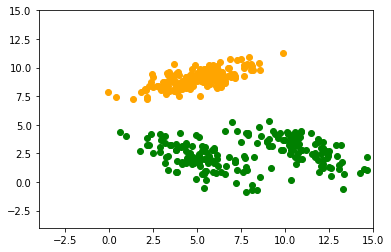

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_p.T[0], X_p.T[1], color="orange")
ax.scatter(X_n.T[0], X_n.T[1], color="green")
ax.set_ylim(-4, 15)
ax.set_xlim(-4, 15)

In [11]:
from mll2021ss.classifiers.logistic_regression import LogisticRegressionClassifier, logistic_regression_loss, logistic_regression_train, logistic_regression_predict

In [12]:
X_train, y_train = data_train[:,:-1], data_train[:,-1:]
X_test, y_test = data_test[:,:-1], data_test[:,-1:]

In [57]:
w = logistic_regression_train(np.insert(X_train, 0, 1, axis=1), y_train)
logistic_regression_loss(np.insert(X_train, 0, 1, axis=1), y_train, w)

array([0.04202103])

In [58]:
y_hat = logistic_regression_predict(np.insert(X_test, 0, 1, axis=1), w)
np.sum(y_hat == y_test, axis=0) / y_test.shape[0]

array([0.])

# 04. k-means

In [7]:
from mll2021ss.classifiers.k_means import KMeansClassifier, \
    k_means_loss, k_means_train, k_means_predict

In [33]:
n_pre_cluster = 100
cluster = [
    ([5, 9], [[2.5, 0.8], [0.8, 0.5]]),
    ([11, 3], [[3, -1.3], [-1.3, 1.2]]),
    ([5, 2], [[3, -1.3], [-1.3, 1.2]])
]

X = np.vstack([np.random.multivariate_normal(mean, cov, n_pre_cluster) for mean, cov in cluster])

In [38]:
# X_train from 03
centroids = k_means_train(X, 3, iteration_count=1000)
Y_hat = k_means_predict(X, centroids)
k_means_loss(X, Y_hat), centroids

(74.46026487467583,
 array([[ 5.1978309 ,  1.830516  ],
        [ 5.07280928,  9.06339529],
        [10.83880851,  2.99418101]]))

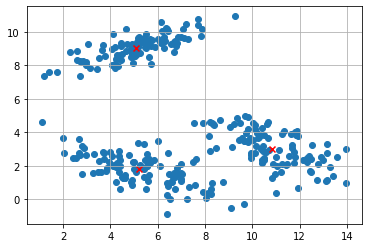

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.grid()
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color="red")